In [36]:
from plot import *

---
# Reorg test

In [5]:
print("Import Train Data...")

training_folders = [
    "../../Data/Processed/train/epidural",
    "../../Data/Processed/train/intraparenchymal",
    "../../Data/Processed/train/subarachnoid",
    "../../Data/Processed/train/intraventricular",
    "../../Data/Processed/train/subdural",
    "../../Data/Processed/train/nohem",
]

train_data = Data(training_folders, 
            {
                "epidural":"any", 
                "intraparenchymal":"any", 
                "subarachnoid":"any", 
                "intraventricular":"any", 
                "subdural":"any", 
            }, 
            maximum_per_folder = 1000, 
            multi_pool = False, 
            size = 256
            )

print("Amound of train data being used:", len(train_data))

Import Train Data...
Unpacking epidural
Unpacking intraparenchymal
Unpacking subarachnoid
Unpacking intraventricular
Unpacking subdural
Unpacking nohem
Amound of train data being used: 5922


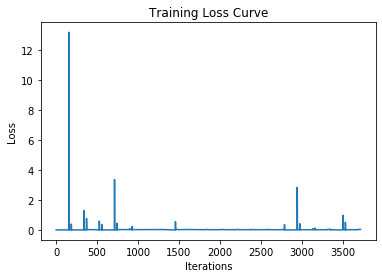

,6.158863753080368042e-02
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
3714,0.033698
3715,0.033634
3716,0.033867
3717,0.032901


In [16]:
plotLosses("../Models/reorg_test")

In [21]:
print("Import Train Data...")

val_folders = [
    "../../Data/Processed/val/epidural",
    "../../Data/Processed/val/intraparenchymal",
    "../../Data/Processed/val/subarachnoid",
    "../../Data/Processed/val/intraventricular",
    "../../Data/Processed/val/subdural",
    "../../Data/Processed/val/nohem",
]

val_data = Data(val_folders, 
            {
                "epidural":"any", 
                "intraparenchymal":"any", 
                "subarachnoid":"any", 
                "intraventricular":"any", 
                "subdural":"any", 
            }, 
            maximum_per_folder = int(0.2*1000/0.8), 
            multi_pool = False, 
            size = 256
            )

print("Amound of val data being used:", len(val_data))

Import Train Data...
Unpacking epidural
Unpacking intraparenchymal
Unpacking subarachnoid
Unpacking intraventricular
Unpacking subdural
Unpacking nohem
Amound of val data being used: 1229


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


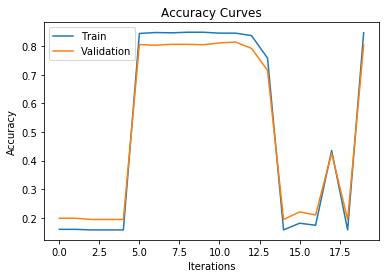

In [37]:
acc=plotAccuracy("../Models/reorg_test", train_dataset=train_data, val_dataset=val_data, use_cuda=True)

# Overfit

In [16]:
import torch.nn as nn
import torchvision.models

# from Full_detector_training import HemorrhageDetector

alexnet_model = torchvision.models.alexnet(pretrained=True)
alexnet_model.features[0] = nn.Conv2d(1, 64, kernel_size= 7, stride= 2, padding= 3)

class HemorrhageDetector(nn.Module):
    def __init__(self):
        super(HemorrhageDetector, self).__init__()
        self.name = "Detector"

        for param in alexnet_model.parameters():
              param.requires_grad = False

        self.fc1 = nn.Linear(256*31*31, 100)
        self.fc2 = nn.Linear(100, 2)

    def forward(self, x):
        x = alexnet_model.features(x)
#         print(x.shape)
        x = x.view(-1, 256*31*31)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

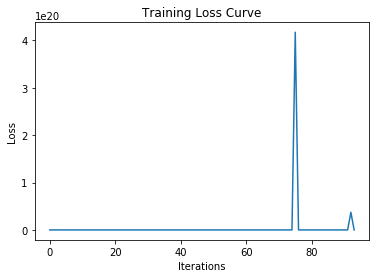

,1.043893583118915558e-02
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
374,NaN
375,NaN
376,NaN
377,NaN


In [5]:
plotLosses("Model_resizing_test_complex_bs=32")

Val....
Unpacking epidural
Unpacking intraparenchymal
Unpacking subarachnoid
Unpacking intraventricular
Unpacking subdural
Unpacking nohem
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


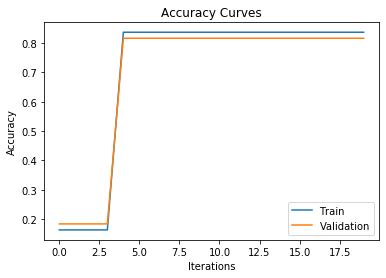

In [43]:
print("Val....")

val_folders = [
    "../Data/Processed/val/epidural",
    "../Data/Processed/val/intraparenchymal",
    "../Data/Processed/val/subarachnoid",
    "../Data/Processed/val/intraventricular",
    "../Data/Processed/val/subdural",
    "../Data/Processed/val/nohem",
]

val_data = Data(val_folders, {
    "epidural":"any", 
    "intraparenchymal":"any", 
    "subarachnoid":"any", 
    "intraventricular":"any", 
    "subdural":"any", 
}, 10, False)

plotAccuracy(HemorrhageDetector, "Model_Overfit_detector_Alex", train_dataset=train_data, val_dataset=val_data)

# 27k

In [10]:
# plotLosses("Model_27k_detector_Alex")
# ! ls Model_27k_detector_Alex

0
1
2
3
4
5
6
7
8


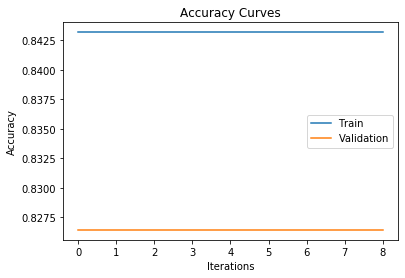

In [22]:
plotAccuracy(HemorrhageDetector, "Model_27k_detector_Alex", val_data, train_dataset=train_data)